## Data Preprocessing

Necessary imports:

In [1]:
import pandas as pd
import numpy as np

There are four trade branches for which data containing the monthly price values (in millions $) of the serviced orders in the USA from February 1992 to September 2023 (a total of 380 values for each) has been provided. 

<br>This data must first be loaded from the branches' corresponding csv files.</br>

<br><b>Branch 1 (K1) Computers and Electronic Products:</b> data ComputersElectronicProducts.csv</br>
<br><b> Branch 2 (K2) Defense Capital Goods:</b> data DefenseCapitalGoods.csv</br>
<br><b>Branch 3 (K3) Motor Vehicle Parts:</b> data MotorVehiclesParts.csv</br>
<br><b>Branch 4 (K4) Primary Metals:</b> data PrimaryMetals.csv</br>

Note: the first 6 rows need to be skipped to clear out unecessary information 

In [2]:
k1=pd.read_csv(r"C:\Users\Nefeli\Desktop\optiProject1\data_ComputersElectronicProducts.csv",skiprows=6) 
k2=pd.read_csv(r"C:\Users\Nefeli\Desktop\optiProject1\data_DefenseCapitalGoods.csv",skiprows=6)
k3=pd.read_csv(r"C:\Users\Nefeli\Desktop\optiProject1\data_MotorVehiclesParts.csv",skiprows=6)
k4=pd.read_csv(r"C:\Users\Nefeli\Desktop\optiProject1\data_PrimaryMetals.csv",skiprows=6)

#k1.head(10)
#k2.head(10)
#k3.head(10)
#k4.head(10)

In [3]:
k1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Period  384 non-null    object 
 1   Value   380 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.1+ KB


In [4]:
k2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Period  384 non-null    object 
 1   Value   380 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.1+ KB


In [5]:
k3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Period  384 non-null    object 
 1   Value   380 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.1+ KB


In [6]:
k4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Period  384 non-null    object 
 1   Value   380 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.1+ KB


<u>Note About the info:</u> The number of dates is greater than the number of values. This occurs because there are some months that need to be filtered out since they don't belong in th examined time range and have NA as their value number. NA is perceived as a null value by Pandas. 

### Retain period range between Feb 1992 and Sept 2023 

By transforming the date format from Month-Year to datetime format, it is easier to define a range with the purpose of retaining only values that correspond to the time range: February 1992 - September 2023. Each date in datetime format will retain the month and year information but will have the day set to the first of the month and the time equal to 00:00:00. This extra data is not causing any problems for the purposes the dates are being used for.

In [7]:
#convert to datetime
k1['Period'] = pd.to_datetime(k1['Period'], format='%b-%Y')
k2['Period'] = pd.to_datetime(k2['Period'], format='%b-%Y')
k3['Period'] = pd.to_datetime(k3['Period'], format='%b-%Y')
k4['Period'] = pd.to_datetime(k4['Period'], format='%b-%Y')

#Example for k1 
print("Start = Jan 1992 ->", k1['Period'].min())
print("End = Dec 2023 ->", k1['Period'].max())

Start = Jan 1992 -> 1992-01-01 00:00:00
End = Dec 2023 -> 2023-12-01 00:00:00


In [8]:
#keep only the entries for dates between Feb 1992 and Sept 2023

feb92=pd.to_datetime('Feb-1992', format='%b-%Y')
sept23=pd.to_datetime('Sep-2023', format='%b-%Y')

k1 = k1[k1['Period'].between(feb92,sept23)]
k2 = k2[k2['Period'].between(feb92,sept23)]
k3 = k3[k3['Period'].between(feb92,sept23)]
k4 = k4[k4['Period'].between(feb92,sept23)]

### Checking for null values 

In [9]:
k1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 1 to 380
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Period  380 non-null    datetime64[ns]
 1   Value   380 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [10]:
k2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 1 to 380
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Period  380 non-null    datetime64[ns]
 1   Value   380 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [11]:
k3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 1 to 380
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Period  380 non-null    datetime64[ns]
 1   Value   380 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [12]:
k4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 1 to 380
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Period  380 non-null    datetime64[ns]
 1   Value   380 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


The files are small enough to scan over manually, but as a safety measure, the number of non-null Period entries must be equal to the number of non-null Value entries for all dataframes. It is observed that is the case for all four cases and no NA.

### Creating the Relative Performance columns 

A new column must be introduced in each of the dataframes. This column contains the Relative Performance values for each month, considering the first month of the examined period (Feb 1992) as the base/reference month. It is produced by applying the following formula:

$$ 
R_j^{(i)} = \frac{price \; in \; month \; j \; for\; branch\; K_i}{price\; in\; month\; 1\; for\; branch\; K_i} - 1 
$$

where j = 1,2,...,380 and i = 1,2,3,4.

In [13]:
def getRelativePerformanceValue(monthPrice,baseMonthPrice):
    return ((monthPrice/baseMonthPrice)-1)

In [14]:
k1_baseMonthPrice = k1.loc[k1['Period']==feb92 ,'Value'].values[0]  # 0 index is necessary because it returns an np array
k2_baseMonthPrice = k2.loc[k2['Period']==feb92 ,'Value'].values[0]
k3_baseMonthPrice = k3.loc[k3['Period']==feb92 ,'Value'].values[0]
k4_baseMonthPrice = k4.loc[k4['Period']==feb92 ,'Value'].values[0]

k1['Ri_j'] = k1['Value'].apply(lambda monthPrice : getRelativePerformanceValue(monthPrice,k1_baseMonthPrice))
k2['Ri_j'] = k2['Value'].apply(lambda monthPrice : getRelativePerformanceValue(monthPrice,k2_baseMonthPrice))
k3['Ri_j'] = k3['Value'].apply(lambda monthPrice : getRelativePerformanceValue(monthPrice,k3_baseMonthPrice))
k4['Ri_j'] = k4['Value'].apply(lambda monthPrice : getRelativePerformanceValue(monthPrice,k4_baseMonthPrice))

### Calculating the mean Relative Performance values 

Each branch now has a relative performance vector $$R^{(i)} =[R_1^{(i)},R_2^{(i)},...,R_{380}^{(i)}]  $$

This vector corresponds to the Ri_j column in the corresponding dataframe. It is necessary to also calculate the mean of each of those four vectors.

The mean value for each branch $$ \overline{R}^{(i)} = mean(R^{(i)})=\frac{1}{380}\sum_{j=1}^{380}R_j^{(i)}$$ can be collected in a separate vector R_means. (i=1,2,3,4)

In [15]:
R_means = [np.mean(k1['Ri_j']),np.mean(k2['Ri_j']),np.mean(k3['Ri_j']),np.mean(k4['Ri_j'])]
R_means

[0.29283428631380165,
 0.38721166724539907,
 0.7666054369330031,
 0.6261117148659746]

### Calculating the covariance matrix  

Pandas has its own covariance function that can calculate the covariance of the columns of a dataframe, as demonstrated in its documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html.

The covariance matrix that must be found is the one regarding the relative performances:

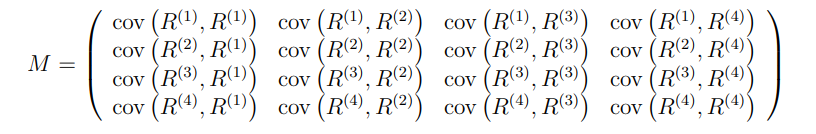

So, the corresponding relative performance columns can be extracted and placed as columns in a new dataframe that will be used to extract the covariance matrix.

In [16]:
Ri_j_df = pd.concat([k1['Ri_j'], k2['Ri_j'], k3['Ri_j'],k4['Ri_j']], axis=1)

In [17]:
Ri_j_df.head(10)

,Ri_j,Ri_j,Ri_j,Ri_j
1,0.000000,0.000000,0.000000,0.000000
2,0.126947,0.128652,0.028784,0.066991
3,-0.155012,-0.094094,0.070648,-0.002896
4,-0.051304,-0.026076,0.099856,-0.012146
5,0.139852,-0.064562,0.057061,0.040363
6,-0.107905,-0.493560,-0.289875,-0.095861
7,-0.058385,-0.314012,-0.042372,-0.059236
8,0.206001,-0.006755,-0.029377,-0.115108
9,-0.007082,0.557022,0.116534,-0.074185
10,0.136128,0.229500,0.043600,-0.084369


In [18]:
#the covariance matrix is:
M=Ri_j_df.cov()

In [19]:
M

,Ri_j,Ri_j,Ri_j,Ri_j
Ri_j,0.074932,0.016453,-0.007063,-0.025907
Ri_j,0.016453,0.386793,0.117408,0.125475
Ri_j,-0.007063,0.117408,0.213959,0.136683
Ri_j,-0.025907,0.125475,0.136683,0.218765


In [21]:
M.values

array([[ 0.07493161,  0.01645338, -0.00706299, -0.0259072 ],
       [ 0.01645338,  0.38679314,  0.11740771,  0.1254754 ],
       [-0.00706299,  0.11740771,  0.21395927,  0.13668301],
       [-0.0259072 ,  0.1254754 ,  0.13668301,  0.2187645 ]])

R_means and M will be used in the Python implementation of a set of gradient based optimization algorithms aiming to provide a solution to the problem of finding the percent of capital that needs to be invested in each of the branches, all while  maximizing performance and simutaneously minimizing the risk. 